**هدف این سلول:**  
وارد کردن کتابخانه‌های موردنیاز برای تحلیل داده

**توضیح:**  

`import pandas as pd`

به معنای وارد کردن کتابخانه پانداس با نام اختصاری پی‌دی است. بنابراین برای استفاده از توابع این کتابخانه، بصورت زیر در کد استفاده می‌شود

`pd.function_name`

###Example :   pd.read_csv()

In [2]:
# Linear Regression between A_root_k and Porosity (%)
# -------------------------------------------
# Notebook for: Machine Learning Applications in Petroleum Data
# Author: Arman Mojoodi

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [4]:
# خواندن داده از گوگل درایو
url = "https://drive.google.com/uc?id=1FalSIuhhcSz2fhppbP2usIzNA7DvALxT"
data = pd.read_csv(url)


# بررسی اجمالی داده‌ها با مشاهده مقادیر ابتدایی دیتاست و چاپ عنوان ستونها
print(data.head(),'\n\n')
print(data.columns)

   Porosity (%)  Matrix Perm (nd)  Acoustic impedance (kg/m2s*10^6)  \
0         8.456               292                             3.080   
1         8.666               353                             3.542   
2         9.814               259                             4.411   
3        12.369               675                             2.893   
4        12.264               457                             3.498   

   Brittleness Ratio  TOC (%)  Vitrinite Reflectance (%)   Aroot(K)  
0             97.680     4.64                      1.848  48.306469  
1             55.404     3.56                      1.504  41.300912  
2             87.360     3.56                      2.176  49.688356  
3             47.772     4.32                      1.504  59.132694  
4             13.128     6.04                      1.520  39.503121   


Index(['Porosity (%)', 'Matrix Perm (nd)', 'Acoustic impedance (kg/m2s*10^6)',
       'Brittleness Ratio', 'TOC (%)', 'Vitrinite Reflectance (%)',
   

In [5]:

# این دستور توضیحات آماری هر ستون را جداگانه نشان می‌دهد که برای آشنایی بهتر با داده‌ها مناسب است
data.describe()

,Porosity (%),Matrix Perm (nd),Acoustic impedance (kg/m2s*10^6),Brittleness Ratio,TOC (%),Vitrinite Reflectance (%),Aroot(K)
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,10.493805,433.075000,3.265735,57.794340,3.970700,1.571440,50.000000
std,2.079824,173.101415,0.623574,16.955346,1.907119,0.240662,11.505310
min,4.585000,113.000000,1.408000,13.128000,0.100000,0.744000,24.437856
25%,9.038750,312.250000,2.802250,45.306000,2.470000,1.416000,41.961030
50%,10.549000,403.500000,3.250500,59.412000,4.120000,1.568000,49.692285
75%,12.181750,528.750000,3.679500,69.915000,5.400000,1.714000,58.986667
max,16.485000,987.000000,5.093000,101.196000,8.720000,2.296000,77.270733


**هدف این سلول:**  
تعیین متغیرهای مستقل و وابسته و ساخت مدل رگرسیون خطی ساده بین آنها

**توضیح:**  
در این سلول ابتدا متغیرهای مستقل و وابسته طبق توضیحات فایل آموزشی مشخص می‌شوند.
سپس مدل رگرسیون خطی ساده برای آنها ساخته می‌شود. توجه کنید به علت نیاز به بررسی‌های آماری از کل داده‌ها برای ساخت مدل استفاده شده است که توضیحات مربوطه در بخش بحث در نتایج فایل آموزشی ارائه شده است
در ادامه‌ی دستورات این سلول نمودارهای مربوطه و ضرایب عملکردی محاسبه و نمایش داده شده است

In [ ]:
# انتخاب متغیرها
X = data[['Porosity (%)']]
y = data['Aroot(K)']


# ساخت و آموزش مدل رگرسیون خطی
model = LinearRegression()
model.fit(X, y)

# پیش‌بینی روی داده تست
y_pred = model.predict(X)

# ترسیم داده‌ها و خط رگرسیون
plt.figure(figsize=(7,5))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Porosity (%)')
plt.ylabel(r'A$\sqrt{K}$')
plt.title(r'Linear Regression: A$\sqrt{K}$ vs Porosity')
plt.legend()
plt.grid(True)
plt.savefig('regression_plot.png', dpi=300, bbox_inches='tight')
plt.show()

# محاسبه معیارهای عملکرد
r2 = r2_score(y, y_pred)
RSS = np.sum((y - y_pred)**2)
RSE = np.sqrt(RSS / (200  - 2))
print(f"R² : {r2:.3f}")
print(f"RSE : {RSE:.3f}")

# ضرایب مدل
print(f"Intercept (β₀): {model.intercept_:.3f}")
print(f"Slope (β₁): {model.coef_[0]:.3f}")

**در این سلول با استفاده از کتابخانه و تابع دیگری همان مدل رگرسیون ساده بدست آمده است. این تابع علاوه بر ساخت مدل، خروجی‌های آماری گسترده‌تری نسبت به تابع استفاده شده در سلول قبل بدست می‌دهد**

In [ ]:
import statsmodels.api as sm

# متغیر مستقل
X = data[['Porosity (%)']]
X = sm.add_constant(X)  # افزودن ستون ثابت برای β₀

# متغیر وابسته
y = data['Aroot(K)']

# مدل رگرسیون با statsmodels
model_sm = sm.OLS(y, X).fit()

# نمایش نتایج
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:               Aroot(K)   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     572.1
Date:                Wed, 22 Oct 2025   Prob (F-statistic):           2.62e-60
Time:                        06:24:36   Log-Likelihood:                -636.02
No. Observations:                 200   AIC:                             1276.
Df Residuals:                     198   BIC:                             1283.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0341      2.132     -0.016   

Train/Test Split for ML perspective
---

Machine Learning perspective

**در ساخت مدلهای یادگیری ماشین از تمام داده‌های در دسترس استفاده نمی‌شود. این داده‌ها به دو بخش داده‌های آموزشی و تست تقسیم می‌شوند که با داده‌های آموزشی مدل ساخته می‌شود و با داده‌های تست قدرت آن در پیش‌بینی داده‌های دیده نشده محک زده می‌شود. در سلولهای زیر همین تقسیم‌بندی انجام شده و مشابه قبل، مدل و ضرایب عملکردی محاسبه شده‌اند**

R² (train): 0.763
RMSE (train): 5.676
Intercept (β₀): -1.219
Slope (β₁): 4.897


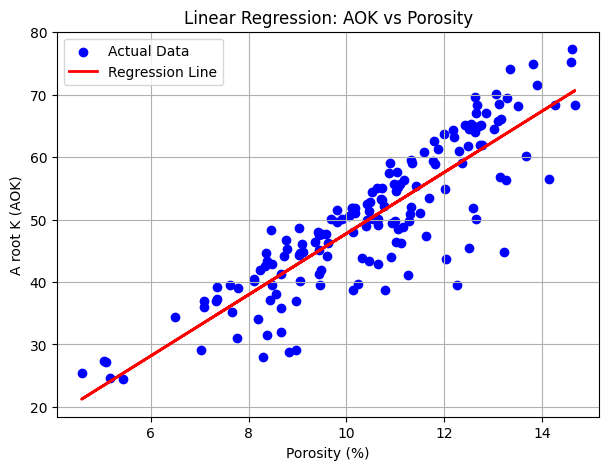

In [ ]:

# انتخاب متغیرها
X = data[['Porosity (%)']]
y = data['Aroot(K)']  # یا هر نام دقیق ستون مربوط به AOK

# تقسیم داده‌ها به آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ساخت و آموزش مدل رگرسیون خطی
model = LinearRegression()
model.fit(X_train, y_train)

# پیش‌بینی روی داده تست
y_pred = model.predict(X_train)

# محاسبه معیارهای عملکرد
r2 = r2_score(y_train, y_pred)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print(f"R² (train): {r2:.3f}")
print(f"RMSE (train): {rmse:.3f}")

# ضرایب مدل
print(f"Intercept (β₀): {model.intercept_:.3f}")
print(f"Slope (β₁): {model.coef_[0]:.3f}")

# ترسیم داده‌ها و خط رگرسیون
plt.figure(figsize=(7,5))
plt.scatter(X_train, y_train, color='blue', label='Actual Data')
plt.plot(X_train, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Porosity (%)')
plt.ylabel('A root K (AOK)')
plt.title('Linear Regression: AOK vs Porosity')
plt.legend()
plt.grid(True)
plt.show()

   Porosity (%)  Matrix Perm (nd)  Acoustic impedance (kg/m2s*10^6)  \
0         8.456               292                             3.080   
1         8.666               353                             3.542   
2         9.814               259                             4.411   
3        12.369               675                             2.893   
4        12.264               457                             3.498   

   Brittleness Ratio  TOC (%)  Vitrinite Reflectance (%)   Aroot(K)  
0             97.680     4.64                      1.848  48.306469  
1             55.404     3.56                      1.504  41.300912  
2             87.360     3.56                      2.176  49.688356  
3             47.772     4.32                      1.504  59.132694  
4             13.128     6.04                      1.520  39.503121  
Index(['Porosity (%)', 'Matrix Perm (nd)', 'Acoustic impedance (kg/m2s*10^6)',
       'Brittleness Ratio', 'TOC (%)', 'Vitrinite Reflectance (%)',
      

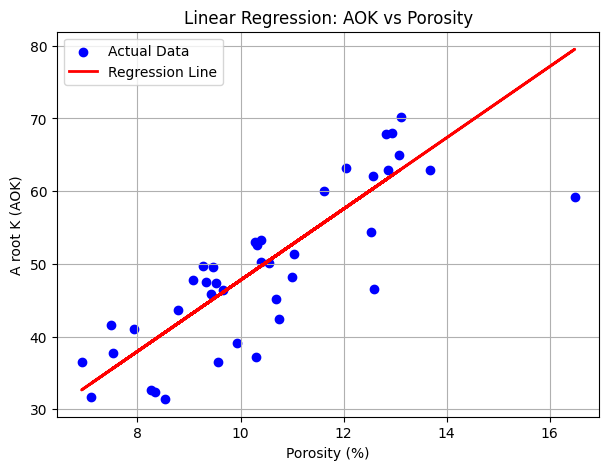

In [ ]:

# پیش‌بینی روی داده تست
y_pred = model.predict(X_test)

# محاسبه معیارهای عملکرد
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R² (test): {r2:.3f}")
print(f"RMSE (test): {rmse:.3f}")

# ضرایب مدل
print(f"Intercept (β₀): {model.intercept_:.3f}")
print(f"Slope (β₁): {model.coef_[0]:.3f}")

# ترسیم داده‌ها و خط رگرسیون
plt.figure(figsize=(7,5))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Porosity (%)')
plt.ylabel('A root K (AOK)')
plt.title('Linear Regression: AOK vs Porosity')
plt.legend()
plt.grid(True)
plt.show()